In [2]:

import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


phish_data = pd.read_csv('C:/Users/User/OneDrive/Desktop/Phishsite.csv')

In [3]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [4]:
phish_data.tail()

,URL,Label
95992,www.gamefaqs.com/computer/doswin/data/926310.html,good
95993,www.gamespot.com/condemned-criminal-origins/pl...,good
95994,xbox360.gamespy.com/xbox-360/condemned-2-blood...,good
95995,xbox360.ign.com/objects/903/903765.html,good
95996,games.teamxbox.com/xbox-360/1737/Condemned-2-B...,good


In [5]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95997 entries, 0 to 95996
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URL     95997 non-null  object
 1   Label   95997 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [6]:
phish_data.isnull().sum()

URL      0
Label    0
dtype: int64

In [7]:
label_counts = pd.DataFrame(phish_data.Label.value_counts())

<AxesSubplot:ylabel='Label'>

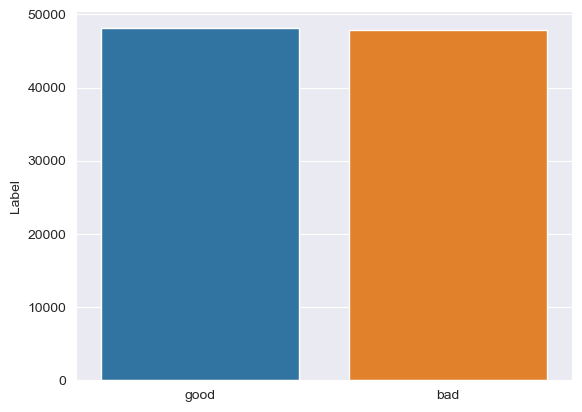

In [8]:
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

In [9]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [10]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [11]:
tokenizer.tokenize(phish_data.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [12]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 2.330939700000002 sec


In [13]:
phish_data.sample(5)

,URL,Label,text_tokenized
48764,homepages.ihug.co.nz/~ma.brown,good,"[homepages, ihug, co, nz, ma, brown]"
56553,www.fibtex.lodz.pl/55_15_57.pdf,good,"[www, fibtex, lodz, pl, pdf]"
23204,www.tuhu.cc/js/?app=com-d3&us.battle.net/login...,bad,"[www, tuhu, cc, js, app, com, d, us, battle, n..."
44332,www.nanbu-shinrin.jp/ca/websscr.php?cmd=_login...,bad,"[www, nanbu, shinrin, jp, ca, websscr, php, cm..."
20251,ofertangas.com/pp-review/www.paypal.com/cgi-bi...,bad,"[ofertangas, com, pp, review, www, paypal, com..."


In [14]:
stemmer = SnowballStemmer("english")

In [15]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 30.5013369 sec


In [16]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
10691,www.wtondossantos.net/~mpolvora/accounts.depar...,bad,"[www, wtondossantos, net, mpolvora, accounts, ...","[www, wtondossanto, net, mpolvora, account, de..."
60891,tech.groups.yahoo.com/group/Expert_HTML/,good,"[tech, groups, yahoo, com, group, Expert, HTML]","[tech, group, yahoo, com, group, expert, html]"
47109,'www.gaoxiaowo.com/image/index.htm?us.battle.n...,bad,"[www, gaoxiaowo, com, image, index, htm, us, b...","[www, gaoxiaowo, com, imag, index, htm, us, ba..."
34055,service.confirm.paypal.cmd.cgi-bin.2466sd4f3e6...,bad,"[service, confirm, paypal, cmd, cgi, bin, sd, ...","[servic, confirm, paypal, cmd, cgi, bin, sd, f..."
47431,rekrims.com/PLO5XIde/webscr_prim.php?cmVrcmltc...,bad,"[rekrims, com, PLO, XIde, webscr, prim, php, c...","[rekrim, com, plo, xide, webscr, prim, php, cm..."


In [17]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.13407299999998656 sec


In [18]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
76830,www.mcenter.com/mtrc/index.html,good,"[www, mcenter, com, mtrc, index, html]","[www, mcenter, com, mtrc, index, html]",www mcenter com mtrc index html
78534,www.smalltalk.org/versions/GNUSmalltalk.html,good,"[www, smalltalk, org, versions, GNUSmalltalk, ...","[www, smalltalk, org, version, gnusmalltalk, h...",www smalltalk org version gnusmalltalk html
81660,www.roottech.com/index.html,good,"[www, roottech, com, index, html]","[www, roottech, com, index, html]",www roottech com index html
71000,squeak.org/SqueakLicense/,good,"[squeak, org, SqueakLicense]","[squeak, org, squeaklicens]",squeak org squeaklicens
56959,www.members.bell.net.mt/sunblock/,good,"[www, members, bell, net, mt, sunblock]","[www, member, bell, net, mt, sunblock]",www member bell net mt sunblock


In [19]:
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [20]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [21]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [22]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d = "C:/Users/user/Downloads/Phishing Site URLs Prediction/"

In [23]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

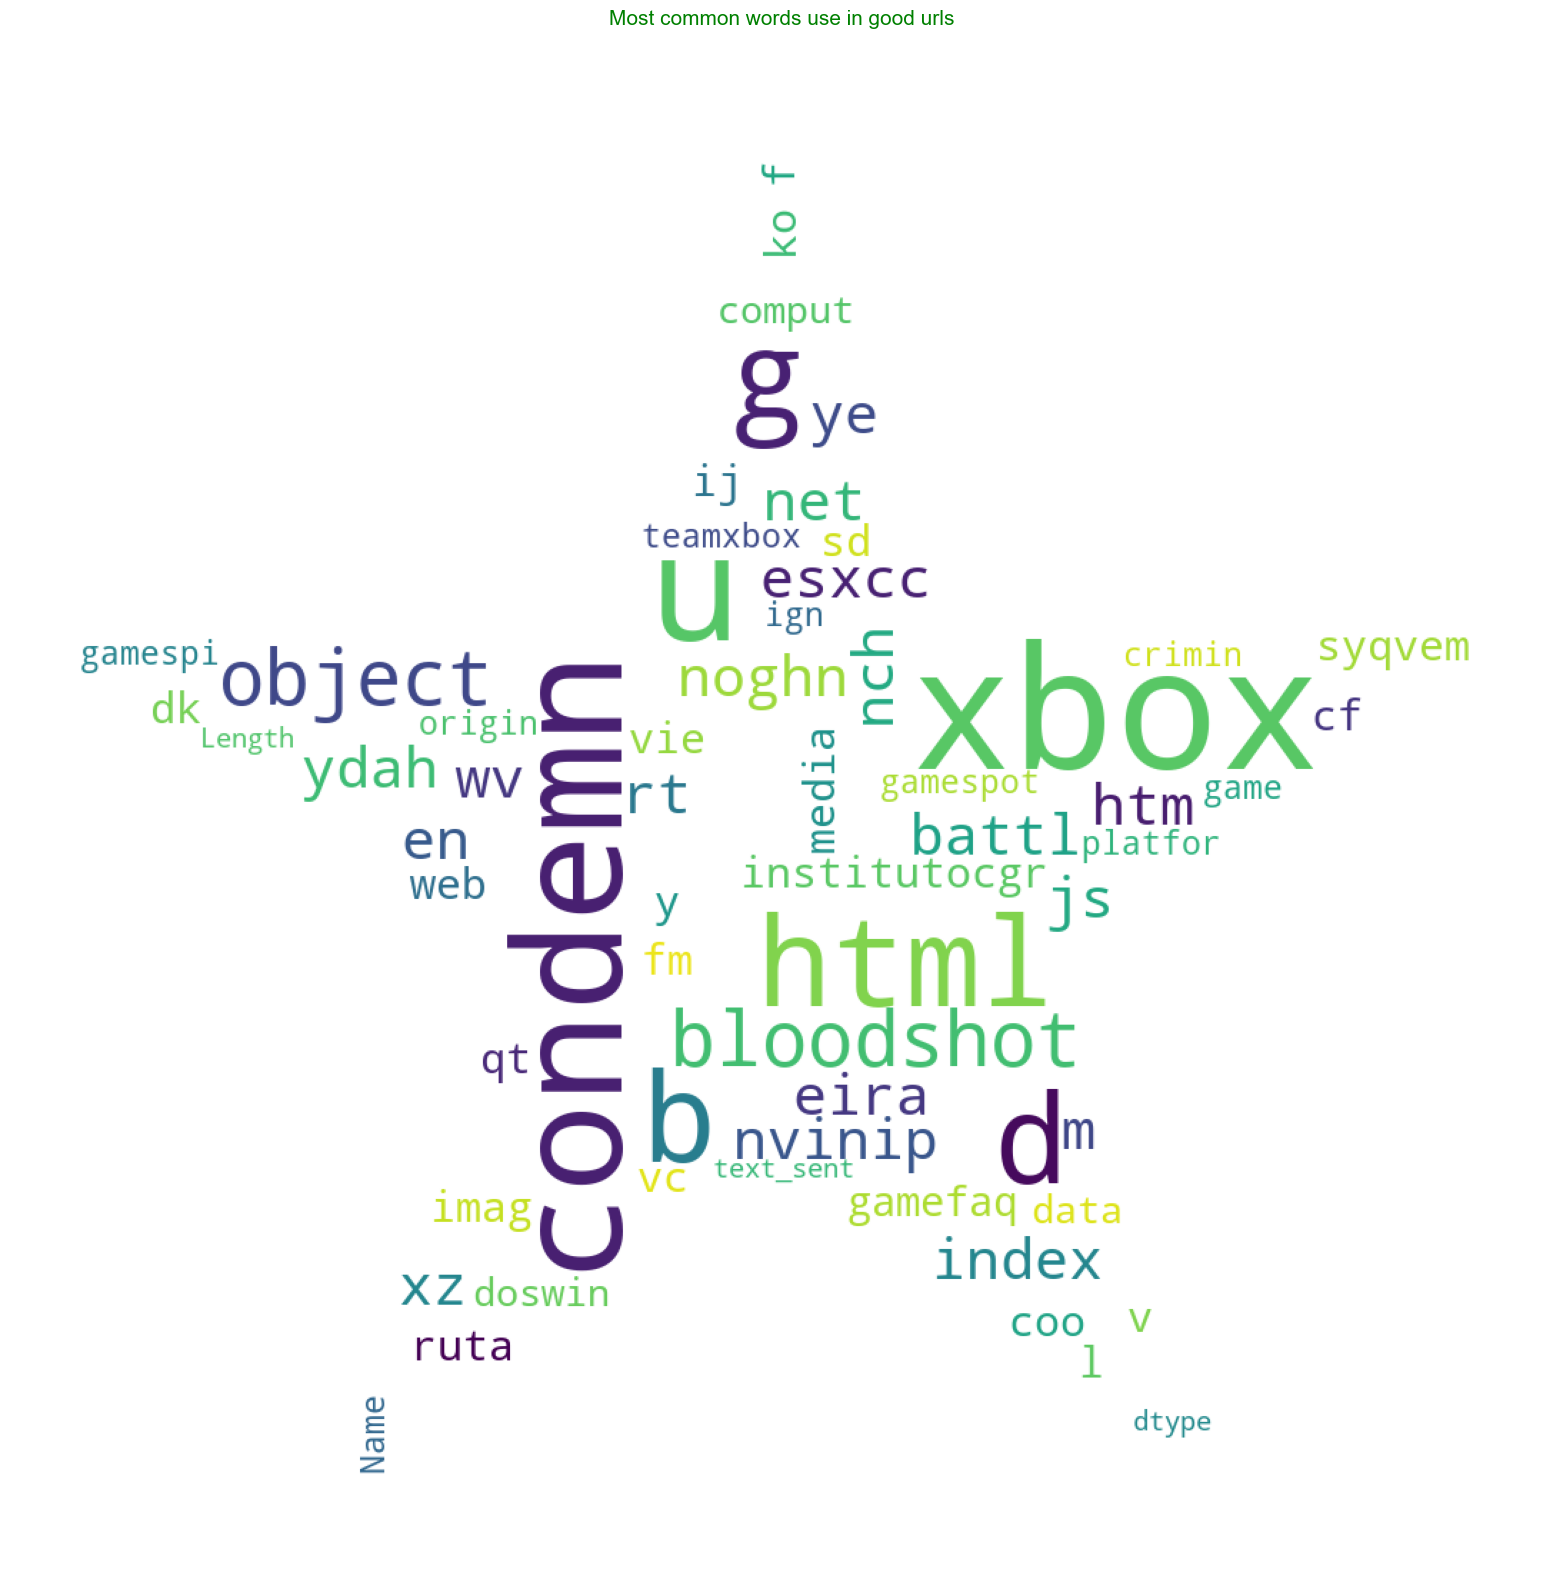

In [24]:
common_text = str(data)
common_mask = np.array(Image.open(d+'star.png',))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

In [25]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

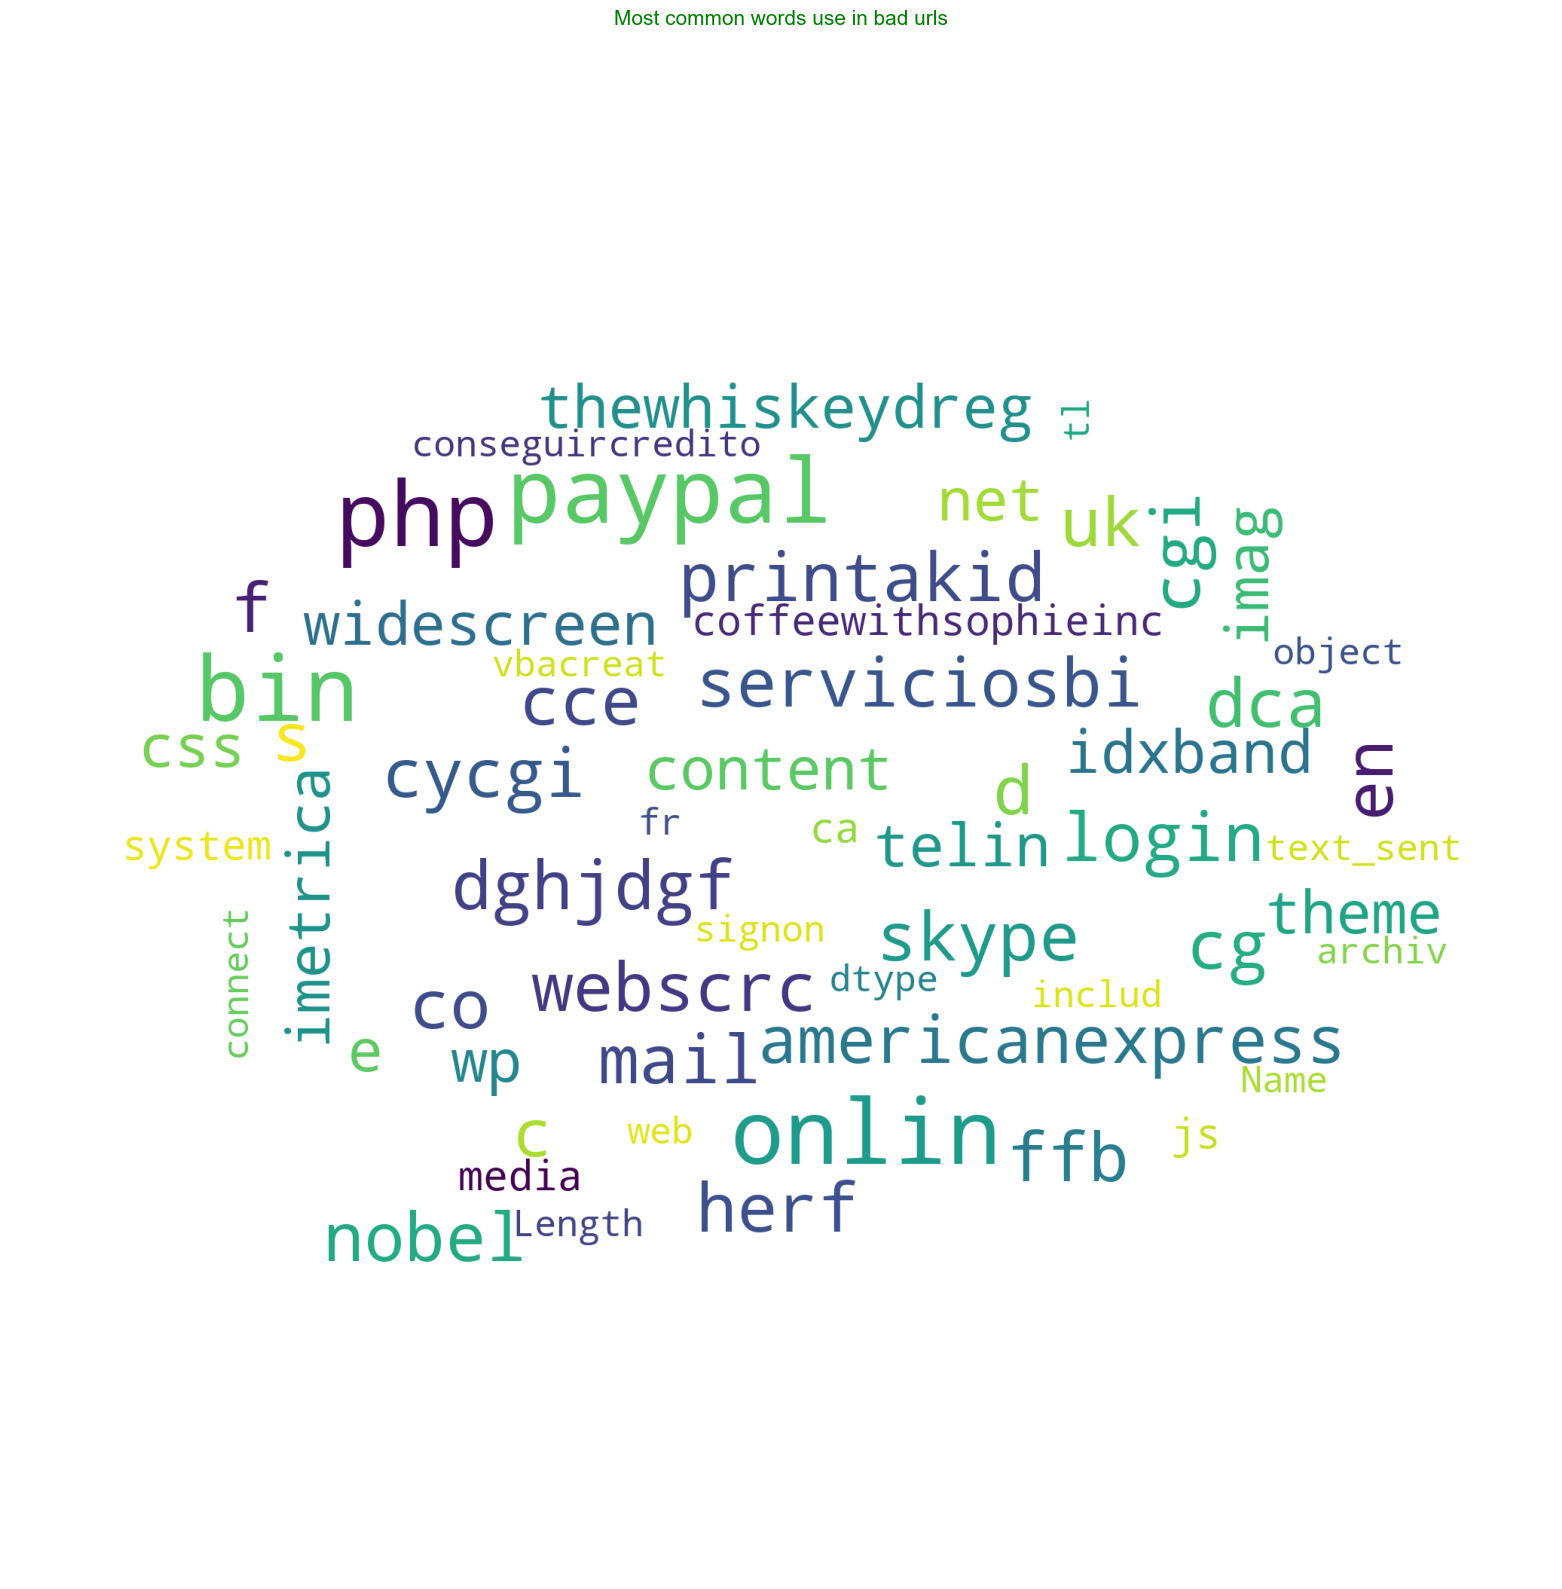

In [26]:
common_text = str(data)
common_mask = np.array(Image.open(d+'comment.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

In [27]:
cv = CountVectorizer()

In [28]:
#help(CountVectorizer())

In [29]:
feature = cv.fit_transform(phish_data.text_sent)

In [30]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

In [32]:
lr = LogisticRegression()

In [33]:
lr.fit(trainX,trainY)

LogisticRegression()

In [34]:
lr.score(testX,testY)

0.9672083333333333

In [35]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9859438587718933
Testing Accuracy : 0.9672083333333333

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.95      0.98      0.97     11663
        Good       0.98      0.96      0.97     12337

    accuracy                           0.97     24000
   macro avg       0.97      0.97      0.97     24000
weighted avg       0.97      0.97      0.97     24000


CONFUSION MATRIX


<AxesSubplot:>

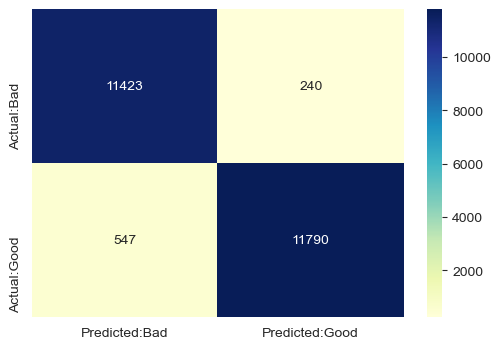

In [36]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [37]:
mnb = MultinomialNB()

In [38]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [39]:
mnb.score(testX,testY)

0.9604166666666667

In [40]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9763879050515993
Testing Accuracy : 0.9604166666666667

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.94      0.98      0.96     11560
        Good       0.98      0.95      0.96     12440

    accuracy                           0.96     24000
   macro avg       0.96      0.96      0.96     24000
weighted avg       0.96      0.96      0.96     24000


CONFUSION MATRIX


<AxesSubplot:>

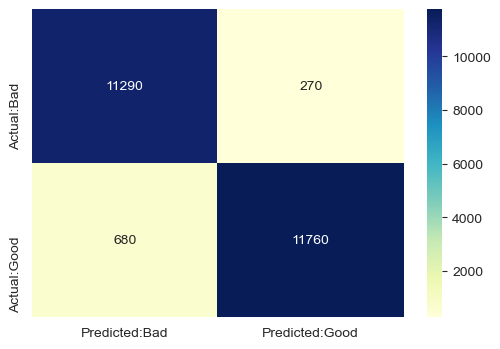

In [41]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dtc = DecisionTreeClassifier()


In [44]:

dtc.fit(trainX, trainY)

DecisionTreeClassifier()

In [45]:
dtc.score(testX,testY)

0.9361666666666667

In [46]:
Scores_ml['Decisiontree'] = np.round(dtc.score(testX,testY),2)

Training Accuracy : 1.0
Testing Accuracy : 0.9361666666666667

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.95      0.93      0.94     12278
        Good       0.92      0.95      0.94     11722

    accuracy                           0.94     24000
   macro avg       0.94      0.94      0.94     24000
weighted avg       0.94      0.94      0.94     24000


CONFUSION MATRIX


<AxesSubplot:>

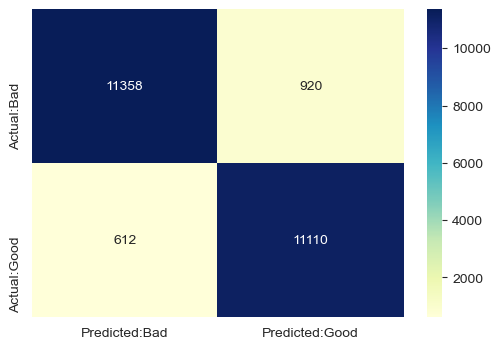

In [47]:
print('Training Accuracy :',dtc.score(trainX,trainY))
print('Testing Accuracy :',dtc.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(dtc.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(dtc.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [48]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [49]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [50]:
rf.fit(trainX,trainY)

RandomForestClassifier(random_state=42)

In [51]:
rf.score(testX,testY)

0.95

Training Accuracy : 0.9999861105323833
Testing Accuracy : 0.95

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.97      0.93      0.95     12506
        Good       0.93      0.97      0.95     11494

    accuracy                           0.95     24000
   macro avg       0.95      0.95      0.95     24000
weighted avg       0.95      0.95      0.95     24000


CONFUSION MATRIX


<AxesSubplot:>

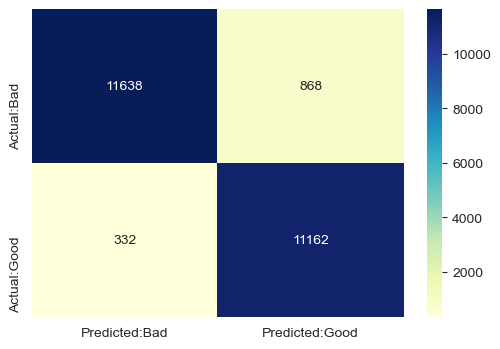

In [52]:
Scores_ml['RandomForest'] = np.round(rf.score(testX,testY),2)
print('Training Accuracy :',rf.score(trainX,trainY))
print('Testing Accuracy :',rf.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(rf.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(rf.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [53]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [54]:
knn= KNeighborsClassifier(n_neighbors=5)

In [55]:
knn.fit(trainX,trainY)

KNeighborsClassifier()

In [56]:
knn.score(testX,testY)

0.8755833333333334

Training Accuracy : 0.9097045710237927
Testing Accuracy : 0.8755833333333334

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.97      0.93      0.95     12506
        Good       0.93      0.97      0.95     11494

    accuracy                           0.95     24000
   macro avg       0.95      0.95      0.95     24000
weighted avg       0.95      0.95      0.95     24000


CONFUSION MATRIX


<AxesSubplot:>

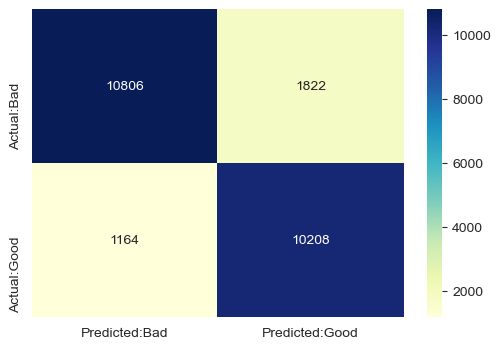

In [57]:
Scores_ml['KNN'] = np.round(knn.score(testX,testY),2)
print('Training Accuracy :',knn.score(trainX,trainY))
print('Testing Accuracy :',knn.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(knn.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(rf.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")